In [32]:
import re
import glob

import tqdm
from bs4 import BeautifulSoup

In [5]:
case_list = glob.glob('./판례/*')

In [6]:
case_list[0]

'./판례/1964532.html'

In [94]:
no_t01 = []
no_judge = []
has_judge = []
judge_regex = re.compile('(?:판사|대법관|재판관)\s+([가-힣]+)(?:\(재판장\))*')

for filename in tqdm.tqdm(case_list):
    bs = BeautifulSoup(open(filename).read().replace('\xa0', ' '))
    t = bs.select('center > .t01-text')
    if not t:
        no_t01.append(filename)
        continue
    t = t[0].get_text().replace('\n', '').strip()
    result = judge_regex.search(t)
    if not result:
        no_judge.append(filename)
    else:
        has_judge.append(filename)

100%|██████████| 172166/172166 [07:18<00:00, 392.79it/s]


In [95]:
len(no_judge)

10032

In [96]:
len(has_judge)

160451

In [99]:
judges = {}
for filename in tqdm.tqdm(has_judge):
    bs = BeautifulSoup(open(filename).read().replace('\xa0', ' '))
    t = bs.select('center > .t01-text')
    t = t[0].get_text().replace('\n', '').strip()
    result = judge_regex.search(t)
    judge_name = result.groups()[0]
    judges.setdefault(judge_name, [])
    judges[judge_name].append(filename)

100%|██████████| 160451/160451 [06:52<00:00, 389.31it/s]


In [104]:
judges_count = list(map(lambda x: (x[0], len(x[1])), judges.items()))

In [106]:
sorted(judges_count, key=lambda x: x[1], reverse=True)

[('이강국', 2353),
 ('고현철', 2171),
 ('윤재식', 1864),
 ('윤영철', 1802),
 ('이규홍', 1712),
 ('박시환', 1706),
 ('강신욱', 1705),
 ('송진훈', 1653),
 ('이용우', 1645),
 ('이인복', 1627),
 ('이상훈', 1618),
 ('박재윤', 1534),
 ('민일영', 1513),
 ('이임수', 1494),
 ('김지형', 1490),
 ('이용훈', 1486),
 ('김영란', 1482),
 ('신영철', 1478),
 ('정귀호', 1457),
 ('김용준', 1435),
 ('조무제', 1435),
 ('박보영', 1430),
 ('김신', 1427),
 ('김소영', 1393),
 ('김용덕', 1372),
 ('김창석', 1364),
 ('전수안', 1354),
 ('안대희', 1343),
 ('박준서', 1340),
 ('양승태', 1330),
 ('유지담', 1325),
 ('김형선', 1321),
 ('서성', 1301),
 ('천경송', 1257),
 ('양창수', 1247),
 ('김능환', 1236),
 ('지창권', 1217),
 ('신성택', 1206),
 ('박만호', 1174),
 ('이회창', 1159),
 ('김석수', 1123),
 ('이돈희', 1104),
 ('조희대', 1095),
 ('권순일', 1088),
 ('이홍훈', 1077),
 ('손지열', 1039),
 ('이영섭', 1037),
 ('이기택', 1007),
 ('이일규', 1000),
 ('박우동', 975),
 ('윤관', 974),
 ('변재승', 974),
 ('배기원', 972),
 ('박일환', 962),
 ('고영한', 957),
 ('김상원', 917),
 ('김용담', 911),
 ('박병대', 898),
 ('김병로', 870),
 ('박한철', 829),
 ('안용득', 807),
 ('윤일영', 786),
 ('홍순엽', 784),
 ('차한성', 

In [107]:
import pandas as pd
df = pd.DataFrame(judges_count, columns=['이름', '개수'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13359c6a0>]],
      dtype=object)

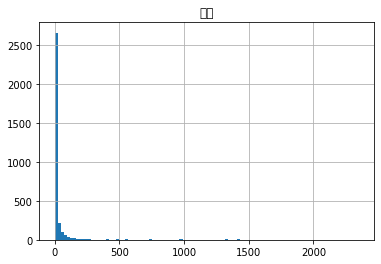

In [110]:
df.hist(bins=100)

In [113]:
df.quantile([0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99])

,개수
0.05,1.0
0.10,1.0
0.30,2.0
0.50,4.0
0.70,13.0
0.90,64.0
0.95,151.0
0.99,1265.8


In [114]:
df.count()

이름    3281
개수    3281
dtype: int64

In [52]:
regex.match('a')[0]

TypeError: 'NoneType' object is not subscriptable

In [131]:
import tqdm
groups = []
unmatched = []
regex = re.compile('(.+) ([0-9]{4}\.\s+[0-9]{1,2}\.\s+[0-9]{1,2})\.{0,1} (?:\. ){0,1}(?:선고|자) (.+) (\S+)$')
for i, filename in tqdm.tqdm(enumerate(case_list)):
    bs = BeautifulSoup(open(filename).read().replace('\xa0', ' '))
    t = bs.select('#bmunStart > h2')[0].get_text().replace('\n', '').strip()
    matched = regex.match(t)
    if not matched:
        print(i, t)
        unmatched.append(i)
    groups.append(matched)

16290it [00:39, 382.68it/s]

16247 대법원 2002. 12. 24선고 99다44427,99다44434(병합) 판결


18867it [00:45, 437.13it/s]

18782 특허청항고심판소 특허청항고심판소. 1990.11. 자 89항당239 심결


24753it [01:00, 385.60it/s]

24689 대법원 1951. 선고 4284형상12 판결


24885it [01:00, 418.72it/s]

24834 대법원 1956. 3. 16선고 4288형상184 판결


25701it [01:02, 405.17it/s]

25627 부산고등법원 2002.10. 2. 선고 2000나4340 판결


27077it [01:05, 436.66it/s]

27029 특허청항고심판소 1990. 9 .2. 자 89항원1004 심결


32756it [01:19, 355.03it/s]

32733 대법원 1957.3 23. 선고 4289민상659 판결


38790it [01:33, 428.07it/s]

38711 특허청항고심판소 1990. 1. 자 89항당60 심결


43127it [01:43, 431.72it/s]

43050 대법원 1959. 11. 12선고 4291민상880 판결


43571it [01:44, 417.31it/s]

43504 서울고등법원 2003. 2. 13선고 2002나12248 판결


46720it [01:52, 443.23it/s]

46656 대법원 2000. 4.11. 선고 2000다3095 판결


56857it [02:16, 434.27it/s]

56792 서울고등법원 1968. 7. 23선고 67구12 판결


88938it [04:03, 254.91it/s]

88899 서울고등법원 1975. 12. 8자 75로96 결정


90490it [04:08, 257.20it/s]

90449 대법원 1973. 9.12. 선고 73도1684 판결


103848it [04:55, 296.56it/s]

103791 서울고등법원 1972. 5. 235. 선고 71구473 판결


106539it [05:03, 261.32it/s]

106484 대법원 1961. 1. 22선고 4294민재항12 판결


109548it [05:13, 288.96it/s]

109497 서울고등법원 1986. 8.25. 선고 86구351 판결


113391it [05:26, 316.63it/s]

113334 서울고등법원 1994. 4.22. 선고 93구22397 판결


115890it [05:34, 306.53it/s]

115841 대법원 1964. 6. 23. 결정 64모14 결정


118872it [05:44, 284.89it/s]

118833 대법원 1991. 12.27. 선고 91누63 판결


119930it [05:48, 262.76it/s]

119899 서울고등법원 1986. 9 .17. 선고 86노2295 판결


122806it [05:58, 279.76it/s]

122765 대법원 1993. 12.10. 선고 93다2827 판결


126014it [06:10, 282.39it/s]

125992 서울지방법원 2001. 17. 선고 2000가합10012 판결


127471it [06:15, 270.45it/s]

127434 대법원 1955.9 9. 선고 4288행상34 판결


142912it [07:09, 267.96it/s]

142866 서울고등법원 2002. 3. 14선고 2001나53556 판결
142888 대구고등법원 1981. 10 .6. 선고 80구85 판결


144053it [07:13, 288.29it/s]

144010 특허청항고심판소 1991. 3. 자 89항당450 심결


148189it [07:27, 279.70it/s]

148153 대법원 74. 12. 10. 자 73후63 심결


148606it [07:29, 296.74it/s]

148557 서울지방법원 1996. 10.16. 선고 96나27857 판결


155026it [07:51, 252.02it/s]

154989 부산지방법원 1991. 8. 선고 90노257 판결


157178it [07:58, 272.33it/s]

157133 서울고등법원 1990. 12.18. 선고 90나35941 판결


158617it [08:03, 306.71it/s]

158571 서울고등법원 1982. 5 4. 선고 81구353 판결


162694it [08:17, 297.64it/s]

162637 대전고등법원 1998. 11. 선고 97구3116 판결


167489it [08:33, 309.52it/s]

167450 수원지방법원 2002. 6. 21선고 2001나15566 판결


172166it [08:50, 324.76it/s]


In [141]:
groups = [group for group in groups if group]

In [184]:
regex = re.compile('(.+) ([0-9]{4}\.\w+[0-9]{1,2}\. [0-9]{1,2})\.{0,1} (?:선고|자) ((?:[0-9]+.*[0-9]*)(?:\(.+\))*,*\w*)+ (.+)')
bs = BeautifulSoup(open(case_list[9958]).read().replace('\xa0', ' ').strip())
print(bs)
t = bs.select('#bmunStart > h2')[0].get_text()
print(t)
matched = regex.match(t)
print(matched)
print(t)

<html><body><div id="areaDetail"><div class="tit_area" id="bmunStart"><h2>대구고등법원 1998. 12. 17 선고 98나2618 판결</h2><p class="sub_title">[소유권이전등기][미간행]</p></div><div class="page_area"><div class="page"><span class="space"></span><p><strong id="Body">【전    문】</strong></p>
<span class="space"></span><p><strong id="Party2" style="font-weight:normal;">
      【원고, 항소인 겸 항소인】
      
          내당주공아파트 재건축조합(소송대리인 변호사 김섭)
      
    </strong></p>
<span class="space"></span><p><strong id="Party4" style="font-weight:normal;">
      【피고, 피항소인】
      
          대한주택공사
      
    </strong></p>
<span class="space"></span><p><strong id="Party6" style="font-weight:normal;">
      【피고, 항 소 인】
      
          이수창
      
    </strong></p>
<span class="space"></span>
      【변론종결】
      <p>  1998. 12. 3.</p>
<span class="space"></span><p><strong id="SubjectDecision" style="font-weight:normal">
      【원심판결】
      
        대구지방법원 1998. 3. 26. 선고 97가합20216 판결
      <span class="space"></span>
</strong></p>
<span

In [121]:
t[-1]

'결'

In [132]:
major_cases = glob.glob('./전국주요법원판결/*')

In [154]:
key_dict = {}
for case_name in major_cases:
    key_dict[case_name] = 1

In [172]:
key_dict = {}
for group in groups:
    for case_name in group[3].split(','):
        t = case_name.split(' ')[0].split('(')[0]
        key_dict[t] = 1

In [156]:
contains

[]

In [178]:
case_filename_regex = re.compile('[0-9]+\S+[0-9]+')
major_case_names = []
for case_name in major_cases:
    matched = case_filename_regex.search(case_name)
    if not matched:
        continue
    major_case_names.append(matched[0])

In [179]:
major_case_names

['2017허3256',
 '2018허2915',
 '2014고정1563',
 '2008고단165',
 '2015고단6349',
 '2017고단639',
 '2005고합728',
 '2018허8586',
 '2010고합1687',
 '2014구합20095',
 '2005가단272511',
 '8.6.2013고정244',
 '2014고합277',
 '2007가단49744',
 '2008고단603',
 '2007누16',
 '2013가합10301[1',
 '2017구합55138',
 '2015가합54789',
 '2018고합381',
 '2008노596',
 '2009노4559',
 '2013나6964',
 '2008허11064',
 '2010고단2206',
 '2019구합23013',
 '2005가합13282',
 '2015.11.11',
 '2009가단17239',
 '2009나38065',
 '2006고단1907',
 '2010구합720',
 '2014고합263',
 '2008누387',
 '2008고단1543',
 '2008가합13053',
 '2015고합316',
 '2009고단4986',
 '2017구합69886',
 '2010나83344',
 '2010누27969',
 '2006가합13784',
 '2009나31069',
 '2013가합5400',
 '2009고정5332',
 '2018나52825_1',
 '2007노783',
 '2014르30446',
 '2012구합33713[1',
 '2006가단66024',
 '2010고단3533',
 '2014노374',
 '2019고단3185',
 '2019고정271',
 '2008나8394',
 '2013가단50210',
 '2008노2229',
 '2013고합284',
 '2011나1682',
 '2008가합19556',
 '2013가단2145',
 '2005나112095',
 '2014구합20232주요판결[1][1',
 '2010고합506',
 '2012노891',
 '2005허8890',
 '2016고

In [180]:
c = 0
for case_name in major_case_names:
    if case_name not in key_dict:
        c += 1
print(c)

17370


In [181]:
len(major_case_names)

22676

In [182]:
key_dict

{'2010도6533': 1,
 '2011헌마175': 1,
 '72노442': 1,
 '87다카124': 1,
 '94도1016': 1,
 '4294민상222': 1,
 '90노135': 1,
 '4290민상70': 1,
 '2002다3587': 1,
 '2005가단23951': 1,
 '97후259': 1,
 '2002다48917': 1,
 '98구15275': 1,
 '72다240': 1,
 '2015도19098': 1,
 '2003다27825': 1,
 '92누1100': 1,
 '2001구15619': 1,
 '97가합799': 1,
 '2009가합18178': 1,
 '89누3267': 1,
 '2010헌마760': 1,
 '2002두8428': 1,
 '84도709': 1,
 '77구225': 1,
 '2015느단360': 1,
 '70나4': 1,
 '2015다31674': 1,
 '78노173': 1,
 '2015헌바158': 1,
 '2013다5091': 1,
 '2000가합549': 1,
 '87구1341': 1,
 '91다21206': 1,
 '69나560': 1,
 '2000나8336': 1,
 '89브12': 1,
 '74다1230': 1,
 '95누979': 1,
 '95다22351': 1,
 '77도3199': 1,
 '89항원1065': 1,
 '99누12931': 1,
 '2016다266507': 1,
 '88도692': 1,
 '66다2221': 1,
 '2000노1163': 1,
 '2012도10147': 1,
 '2006다25745': 1,
 '91다6979': 1,
 '2018다289788': 1,
 '87다카2792': 1,
 '2000헌마224': 1,
 '2012다35033': 1,
 '91구1911': 1,
 '2009도495': 1,
 '2014헌가14': 1,
 '90나34696': 1,
 '96노8073': 1,
 '2013구합10155': 1,
 '2016두41224': 1,
 '91다6160': 1,
 '

In [197]:
rejects = []
sentences = []
non_outcomes = []
jail_regex = re.compile('((?:(?:징역|집행유예)\s{0,1})(?:[0-9]+(?:년|개월|일)\s{0,1})+)')
reject_regex = re.compile('기각한다')
for filename in tqdm.tqdm(case_list):
    bs = BeautifulSoup(open(filename).read().replace('\xa0', ' '))
    outcome = bs.select('#OutCome')
    if not outcome:
        non_outcomes.append(bs)
        continue
    outcome = outcome[0].parent.next_sibling.text
    sentence = jail_regex.search(outcome)
    if sentence:
        sentences.append(outcome)
        continue
    reject = reject_regex.search(outcome)
    if reject:
        rejects.append(outcome)

100%|██████████| 172166/172166 [10:48<00:00, 265.45it/s]


In [1]:
len(rejects)

NameError: name 'rejects' is not defined

In [199]:
len(sentences)

1864

In [200]:
len(non_outcomes)

612

In [202]:
rejects

['  상고를 모두 기각한다.',
 '  검사 및 피고인의 항소를 모두 기각한다.',
 '  상고를 기각한다.',
 '  상고를 기각한다. ',
 '본건 상고를 모두 기각한다.',
 '  상고를 기각한다.  상고비용은 원고의 부담으로 한다.',
 '  상고를 기각한다.',
 '  상고를 기각한다.',
 '원심판결의 지연손해금에 관한 피고 패소 부분 중, 금 8,000,000원에 대한 2000. 9. 1.부터 2003. 5. 31.까지는 연 5푼의, 2003. 6. 1.부터 완제일까지는 연 2할의 각 비율에 의한 금원을 초과하여 지급을 명한 부분을 파기하고 이에 해당하는 원고의 청구를 기각한다.',
 '1. 원고의 청구를 기각한다.',
 '  상고를 기각한다.  상고비용은 원고가 부담한다.',
 '  상고를 기각한다.',
 '  원고의 청구를 기각한다.',
 '이 사건 심판청구를 기각한다.',
 '  상고를 기각한다.  상고비용은 피고가 부담한다.',
 '  항고를 기각한다.',
 '  상고를 기각한다.',
 '상고를 기각한다.',
 '  항고심판청구를 기각한다.',
 '1. 원고들의 항소를 기각한다.',
 '  상고를 기각한다.',
 '   이 상고를 기각한다.',
 '상고를 기각한다. ',
 '  상고를 기각한다.  상고비용은 피고가 부담한다.',
 '  원고들의 청구를 각 기각한다.',
 '  원심판결 중 \n        피고인 1에 대한 부분을 파기하고, 이 부분 사건을 수원지방법원 본원 합의부로 환송한다.  \n        피고인 2 사단법인의 상고를 기각한다.\n      ',
 '  피고들의 항소를 기각한다.',
 '  피고인의 항소를 기각한다.',
 '   1. 원고들의 청구를 기각한다.',
 '  상고를 기각한다.  상고비용은 피고보조참가인이 부담한다.',
 '  상고를 기각한다.',
 '   1. 구 ‘독립유공자예우에 관한 법률 시행령’(2016. 1. 7. 대통령령 제26872호로 개정되고, 2016. 12. 30. 대통령령 제27752호